In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sb
sb.set(rc={'figure.figsize':(11.7,8.27)})

# Importing data

In [2]:
X = pd.read_csv('Boston.csv')
X = X.sample(frac=1) #shuffle
y = X.pop('medv')
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
242,0.10290,30.0,4.93,0,0.428,6.358,52.9,7.0355,6,300,16.6,372.75,11.22
212,0.21719,0.0,10.59,1,0.489,5.807,53.8,3.6526,4,277,18.6,390.94,16.03
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14
185,0.06047,0.0,2.46,0,0.488,6.153,68.8,3.2797,3,193,17.8,387.11,13.15


# Visualising data

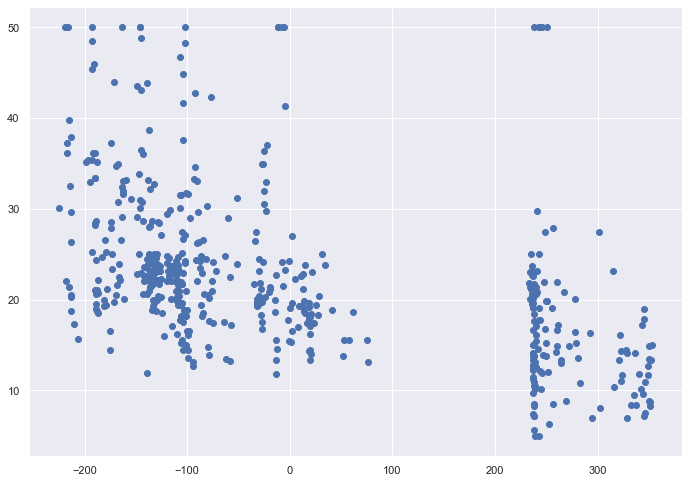

In [3]:
#reducing all features to 1D to plot against midv to visualise.
pca = PCA(n_components=1)
x = pca.fit_transform(X)
plt.scatter(x, y)

(array([ 45.,  37., 100.,  84.,  12.,  52.,  33.,   6.,   0.,   0.,   0.,
         32.,  63.,   9.,  33.]),
 array([-225.17241485, -186.61078531, -148.04915576, -109.48752622,
         -70.92589668,  -32.36426713,    6.19736241,   44.75899196,
          83.3206215 ,  121.88225105,  160.44388059,  199.00551013,
         237.56713968,  276.12876922,  314.69039877,  353.25202831]),
 <BarContainer object of 15 artists>)

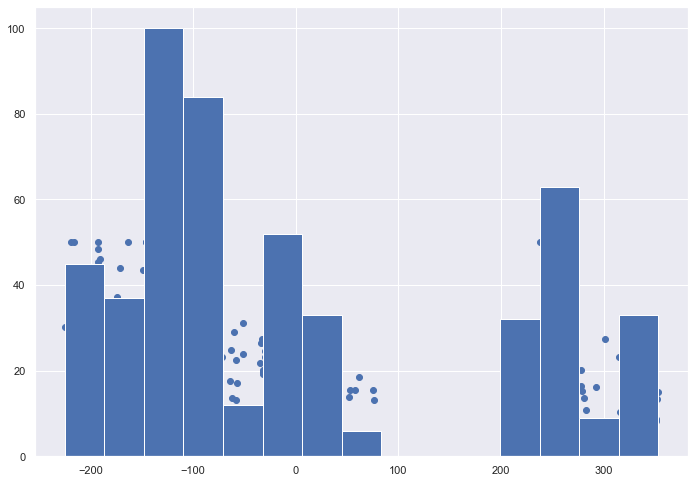

In [4]:
plt.scatter(x, y)
plt.hist(x, bins=15)

# params heat map

The above graph shows the depepndencies of each feature with respect to every other

<AxesSubplot:>

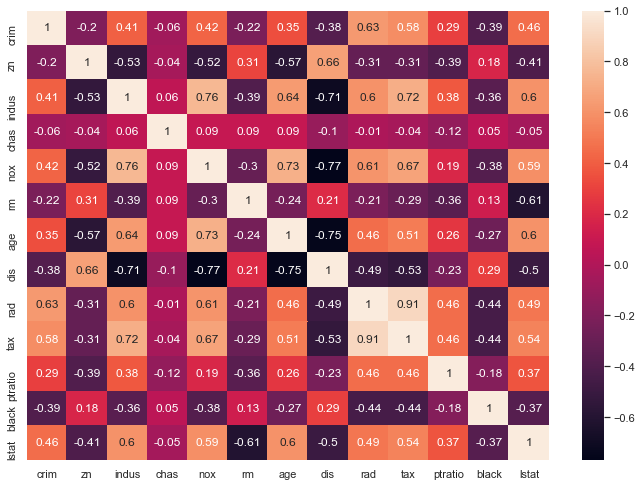

In [5]:
correlation_matrix = X.corr().round(2)
# annot = True to print the values inside the square
sb.heatmap(data=correlation_matrix, annot=True)

# Test Train split & training

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

# Training & Testing function

In [7]:
def train_and_test(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    model.fit(X_train, y_train)
    # on training set
    y_train_pred = model.predict(X_train)
    from sklearn.metrics import mean_squared_error, r2_score
    mse = mean_squared_error(y_train, y_train_pred)
    rmse = np.sqrt(mse) #root mean squared error
    r2 = r2_score(y_train, y_train_pred) #r2 score
    print('Root mean squared error score on trainig set for model', model, ' = ', rmse)
    print('--------------------------------------------------------------------')
    print('r2 score on training set = ', r2)
    print('*********************************************************************')
    # on test split
    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test) #root mean squared error
    r2_test = r2_score(y_test, y_test_pred) #r2 score
    print('Root mean squared error score on test set for model', model, ' = ', rmse_test)
    print('--------------------------------------------------------------------')
    print('r2 score on test set = ', r2_test)
    print('\n')
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('\n')
    return(rmse, r2, rmse_test, r2_test)

# Training and testing different *linear* models

In [8]:
#basic linear regression model
reg = LinearRegression()
regscore = train_and_test(reg)
#with regulrisation
ridge = Ridge()
ridgescore = train_and_test(ridge)

Root mean squared error score on trainig set for model LinearRegression()  =  4.459419908349872
--------------------------------------------------------------------
r2 score on training set =  0.7377934981517299
*********************************************************************
Root mean squared error score on test set for model LinearRegression()  =  5.568662923490613
--------------------------------------------------------------------
r2 score on test set =  0.7357646386299246


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Root mean squared error score on trainig set for model Ridge()  =  4.478423539180558
--------------------------------------------------------------------
r2 score on training set =  0.7355539724633107
*********************************************************************
Root mean squared error score on test set for model Ridge()  =  5.601760708566677
--------------------------------------------------------------------
r2 score on test s

## The scores are good, considering the outliers present in the dataset

## No differnece in accuracy with regularization

# Applying polynomial regression, the x, y plot before shows polynomial dependence and might yield better results.

In [55]:
from sklearn.preprocessing import PolynomialFeatures
#looping for the optimal degree
def polyregression(model):
    score = []
    for i in range(1,4):
        poly = PolynomialFeatures(i)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.fit_transform(X_test)
        print('for model ', model, 'and degree ', i)
        model.fit(X_train_poly, y_train)
        score.append(train_and_test(model, X_train_poly, y_train, X_test_poly, y_test))
    return score

In [56]:
#linear regression without regularization
polyreg_score = polyregression(reg)
polyridge_score = polyregression(ridge)

for model  LinearRegression() and degree  1
Root mean squared error score on trainig set for model LinearRegression()  =  4.459419908349872
--------------------------------------------------------------------
r2 score on training set =  0.7377934981517299
*********************************************************************
Root mean squared error score on test set for model LinearRegression()  =  5.568662923490615
--------------------------------------------------------------------
r2 score on test set =  0.7357646386299244


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


for model  LinearRegression() and degree  2
Root mean squared error score on trainig set for model LinearRegression()  =  2.4015499201324615
--------------------------------------------------------------------
r2 score on training set =  0.9239551238344176
*********************************************************************
Root mean squared error score on test set for model LinearRegression(

/Users/vamshikodipaka/.local/share/virtualenvs/pythonvenv-LHfrLORk/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/vamshikodipaka/.local/share/virtualenvs/pythonvenv-LHfrLORk/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


# Collecting all scores and comparing/analysing for the most optimal model.

In [57]:
#stacking all scores into a numpy array
combined_scores_np = np.vstack([regscore, ridgescore, polyreg_score, polyridge_score])
print(combined_scores_np)

[[ 4.45941991e+00  7.37793498e-01  5.56866292e+00  7.35764639e-01]
 [ 4.47842354e+00  7.35553972e-01  5.60176071e+00  7.32614297e-01]
 [ 4.45941991e+00  7.37793498e-01  5.56866292e+00  7.35764639e-01]
 [ 2.40154992e+00  9.23955124e-01  3.74828819e+00  8.80283220e-01]
 [ 3.35946133e-05  1.00000000e+00  1.60588232e+03 -2.19733740e+04]
 [ 4.47842354e+00  7.35553972e-01  5.60176071e+00  7.32614297e-01]
 [ 2.48930038e+00  9.18296374e-01  4.30573739e+00  8.42026532e-01]
 [ 3.32827851e+00  8.53941767e-01  1.74671518e+01 -1.59976005e+00]]


## converting to pandas and creating a table with labels

In [58]:
combined_scores_df = pd.DataFrame(combined_scores_np)
combined_scores_df

,0,1,2,3
0,4.459420,0.737793,5.568663,0.735765
1,4.478424,0.735554,5.601761,0.732614
2,4.459420,0.737793,5.568663,0.735765
3,2.401550,0.923955,3.748288,0.880283
4,0.000034,1.000000,1605.882325,-21973.374005
5,4.478424,0.735554,5.601761,0.732614
6,2.489300,0.918296,4.305737,0.842027
7,3.328279,0.853942,17.467152,-1.599760


In [59]:
combined_scores_df = pd.DataFrame(combined_scores_np, 
                columns = ['rmse', 'r2', 'rmse_test', 'r2_test'],
                index = ['basic lr', 'regularised lr', 'basic lr degree 1', 'basic lr degree 2', 'basic lr degree 3', 'regularised lr degree 1', 'regularised lr degree 2', 'regularised lr degree 3']
            )
combined_scores_df

,rmse,r2,rmse_test,r2_test
basic lr,4.459420,0.737793,5.568663,0.735765
regularised lr,4.478424,0.735554,5.601761,0.732614
basic lr degree 1,4.459420,0.737793,5.568663,0.735765
basic lr degree 2,2.401550,0.923955,3.748288,0.880283
basic lr degree 3,0.000034,1.000000,1605.882325,-21973.374005
regularised lr degree 1,4.478424,0.735554,5.601761,0.732614
regularised lr degree 2,2.489300,0.918296,4.305737,0.842027
regularised lr degree 3,3.328279,0.853942,17.467152,-1.599760


# Observations

### Baisc & regularised polynomial regression with degree 2 gives the best results. We can see that degree 3 there is extreme overfitting which is reflective in test scores.

In [62]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
reg.fit(X_train_poly, y_train)
train_and_test(reg, X_train_poly, y_train, X_test_poly, y_test)

Root mean squared error score on trainig set for model LinearRegression()  =  2.4015499201324615
--------------------------------------------------------------------
r2 score on training set =  0.9239551238344176
*********************************************************************
Root mean squared error score on test set for model LinearRegression()  =  3.7482881949196876
--------------------------------------------------------------------
r2 score on test set =  0.8802832202820814


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




(2.4015499201324615,
 0.9239551238344176,
 3.7482881949196876,
 0.8802832202820814)

# Now this model can be used to give  most accurate predictions of housing prices